In [1]:
# EDA:
# course path::

# 1) Sourcing
# 2) Cleaning
# 3) Univariate Analysis
# 4) Bi-Variate Analysis
# 5) Derive Metrics: you can create new columns from the exisiting data. For e.g student who cleared the JEE exam, create a new column for it.

# To solve a busniess problem you need to have historical data.
# Typicall data comes from various sources, your first job at hand is to procure the data from private and public sources.
# There are two kinds of data
# 1) Public Data:
# A large amount of data collected by the government or other public agencies is made public for the purposes of research. Such data sets do not require special permission for access and are therefore called public data.

# 2) Private Data:
# On the other hand, private data is that which is sensitive to organisations and is thus not available in the public domain. Banking, telecom, retail, and media are some of the key private sectors that rely heavily on data to make decisions.

# Example of EDA:
# 1) HR-Industry:
# Using data of past and current employee, you can predict which employee is planning to leave. Few characterstics of those will be the 
# no of sick leaves, no of stocks sold, If he is participating in extra curricular activity or not etc.
# using these metrices we can create a scoring mechanism for different employee.

# Similarly for hiring as well we can use EDA.

# use of data in the banking, telecom and human resources sectors. 
# While banks use data to make credit related decisions, telecoms use data to optimise plans for customers and predict customer
# churn. HR data analytics helps identify and predict employee behaviour.

# 2) Retail: 
# Product Purchasing:
# Product Stocking:
# Product Pricing:

# Using retail data we can easily do Market-Basket Analaysis: like which product is most selling.

# Market-Basket Analysis Use Case:
# for a telecom company, using EDA we found out that the top up plans which are multiple of 100 are the most selling one.
# like if a data plan is of 99 or 199 it was getting sold, but plans like 472 was not getting that much sale. 
# so company decided to start selling 28 rs tarrif so that shopkeeper doesn't need to return the exchange and consumer will buy small 
# tarrif plan.

# Media:


# 2) Public Data sources:
# awesome-public-datasets
# Government data sites:
# https://data.gov.in/
# https://data.gov/
# https://data.gov.uk/
# census data: https://censusindia.gov.in: Using census data we can anlyze what is the sex ratio, relgion ratio, how many people have toilets and have their own home etc.
# this is the largest database that we can get from the public.

# some useful sites/repository for data:
# https://webrobots.io/kickstarter-datasets/
# https://github.com/awesomedata/awesome-public-datasets#sports
# http://www.censusindia.gov.in/2011census/C-series/C08.html
# https://github.com/datameet
# https://github.com/datameet/railways


In [3]:
# Data Cleaning:
# once data procurement is done, the next step is to clean data.
# Error Correction: Find phenotics of each words and replace it with most frequent no.
# there are more chances that people will call things correctly, and going with majority is also one of the way of autocorrection in data analysis.
# Data Cleaning Activities:

# 1) Fix rows & Columns:
# Fix rows
# Delete Incorrect Rows | Unnecessary header rows, Footer rows.
# Delte summary rows | Total, subtotal rows.
# Delete Extra rows | Column number indicator rows, blank rows.

# Fix Columns:
# Add columns names if missing | Missing header row
# Rename columns consistently | Abbreviations, encoded columns : imputing the encoded columns name with the real name for e.g c1, c2 to actual column name.
# Delete unncessary columns | Unidentified, irrelevant columns: To save spaces, to save confusion. Get rid of anything which is not clear, not relevant.
# Split columns for more data | Split http://host:port/path into [ Host, port, path]: 
# Merge columns for identifier | FirstName, LastName -> Name State,District -> FullDistrict: to create identifier from the data. For e.g In a database “MLA” containing the details of MLAs throughout India, you have a city named Rampur in Himachal Pradesh, UP and Chhattisgarh. The city names are stored in the “City” column while state names are stored in the “State” column. What is the best way to represent the cities in this case? 
# Align misaligned columns | Shifted columns: If you load files from csv, you can have misaligned data.
# e.g of misaligned data:
# | person | City | State | Highest Edu | Salary  | Error   |
# | A   | Mumbai | Maharasthra| 12th | 12k | |
# | B  | Kol     | Kata       | Wengal | Mba     | 20M | 
# Here we can easily see city name is misaligned.
# The best way to fix these kind of issue is to check for the last columns and see if any rows has value in it, if it has the name that column as 'Error' and merge thsose rows.



# ------------------------------------------------------------------------------------------------------------------------------

# 2) Fix missing values:
# Set Values as missing values | Treat blanks "NA", "XXX", "999" etc as missing.
# Fix missing values with.. | Constant(e.g Zero), Column (e.g Create date defaults to updated date), Function(e.g Average of rows/columns), External data
# Remove missing values | Delete row/Column
# Fill partial missing values  Missing timezone, century etc.

# The most important takeaway from this is - good methods add information, bad methods exaggerate information.
# In case you can add info from reliable external sources, you should use it to replace missing values. But often it's better to let missing 
# values be and continue with the analysis rather than extrapolate the available information.

# Summary ( How to deal with missing values):

# Set values as missing values: Identify values that indicate missing data, and yet are not recognised by the software as such, e.g treat blank strings, "NA", "XX", "999", etc. as missing.

# Adding is good, exaggerating is bad: You should try to get information from reliable external sources as much as possible, but if you can’t, then it is better to keep missing values as such rather than exaggerating the existing rows/columns.

# Delete rows, columns: Rows could be deleted if the number of missing values are significant in number, as this would not impact the analysis. Columns could be removed if the missing values are quite significant in number.

# Fill partial missing values using business judgement: Missing time zone, century, etc. These values are easily identifiable.

In [28]:
import pandas as pd
marks = pd.read_csv('https://query.data.world/s/HqjNNadqEnwSq1qnoV_JqyRJkc7o6O')
marks.head()
data = marks[~(marks.isnull().sum(axis=1) == 5)]
data.isnull().sum(axis=0)
#marks = ~marks.isnull().sum(axis=1)
#print(marks.isnull().sum())

Prefix         0.00
Assignment     2.02
Tutorial      12.12
Midterm       16.16
TakeHome       9.09
Final          5.05
dtype: float64


Prefix         0
Assignment     0
Tutorial      10
Midterm       14
TakeHome       7
Final          3
dtype: int64

In [36]:
# assg
import pandas as pd
customer = pd.read_csv('https://query.data.world/s/y9rxL9mGdP6AXPiDaIL4yYm6DsfTV2')
customer['Cust_id'] = customer.Cust_id.apply(lambda x: x.replace('Cust_', ''))
print(customer.head(10))

# 3) Standarise values: 
# Remove outliers: 
# if the data is from multiple sources, like weights in kg etc.
# standarised precision:
# scale value if required: fit to percentage to 
# for e.g E.g. let's take a data set containing the grades of students studying at different universities. Some of the universities give grades on a scale of 4, while others give grades on a scale of 10. Therefore, you cannot assume that a GPA of 3 on a scale of 4 is equal to a GPA of 3 on a scale of 10, even though they are same quantitatively. Thus, for the purpose of analysis, these values need to be brought to a common scale, such as the percentage scale.
#
# Standardise units: Ensure all observations under a variable have a common and consistent unit, e.g. convert lbs to kgs, miles/hr to km/hr, etc.

# Scale values if required:  Make sure the observations under a variable have a common scale

# Standardise precision for better presentation of data, e.g. 4.5312341 kgs to 4.53 kgs.

# Remove outliers: Remove high and low values that would disproportionately affect the results of your analysis.


# -------------
# Standarised Values:

# Remove extra characters like such as common prefix/suffix, leading/trailing/multiple spaces, etc. These are irrelevant to analysis.

# Standardise case: There are various cases that string variables may take, e.g. UPPERCASE, lowercase, Title Case, Sentence case, etc.

# Standardise format: E.g. 23/10/16 to 2016/10/23, “Modi, Narendra" to “Narendra Modi", etc.

# 4) Fix Invalid Values:
# Encode unicode properly: In case the data is being read as junk characters, try to change encoding, E.g. CP1252 instead of UTF-8.
# Convert incorrect data types: Correct the incorrect data types to the correct data types for ease of analysis. E.g. if numeric values are stored as strings, it would not be possible to calculate metrics such as mean, median, etc. Some of the common data type corrections are — string to number: "12,300" to “12300”; string to date: "2013-Aug" to “2013/08”; number to string: “PIN Code 110001” to "110001"; etc.
# Correct values that go beyond range: If some of the values are beyond logical range, e.g. temperature less than -273° C (0° K), you would need to correct them as required. A close look would help you check if there is scope for correction, or if the value needs to be removed.
# Correct values not in the list: Remove values that don’t belong to a list. E.g. In a data set containing blood groups of individuals, strings “E” or “F” are invalid values and can be removed.
# Correct wrong structure: Values that don’t follow a defined structure can be removed. E.g. In a data set containing pin codes of Indian cities, a pin code of 12 digits would be an invalid value and needs to be removed. Similarly, a phone number of 12 digits would be an invalid value.
# Validate internal rules: If there are internal rules such as a date of a product’s delivery must definitely be after the date of the order, they should be correct and consistent.



        Customer_Name Province   Region Customer_Segment Cust_id
0  MUHAMMED MACINTYRE  NUNAVUT  NUNAVUT   SMALL BUSINESS       1
1        BARRY FRENCH  NUNAVUT  NUNAVUT         CONSUMER       2
2       CLAY ROZENDAL  NUNAVUT  NUNAVUT        CORPORATE       3
3      CARLOS SOLTERO  NUNAVUT  NUNAVUT         CONSUMER       4
4        CARL JACKSON  NUNAVUT  NUNAVUT        CORPORATE       5
5      MONICA FEDERLE  NUNAVUT  NUNAVUT        CORPORATE       6
6     DOROTHY BADDERS  NUNAVUT  NUNAVUT      HOME OFFICE       7
7     NEOLA SCHNEIDER  NUNAVUT  NUNAVUT      HOME OFFICE       8
8         CARLOS DALY  NUNAVUT  NUNAVUT      HOME OFFICE       9
9       CLAUDIA MINER  NUNAVUT  NUNAVUT   SMALL BUSINESS      10


In [37]:
#5) Filter Data:
# Deduplicate data: Remove identical rows, remove rows where some columns are identical
# Filter rows: Filter by segment, filter by date period to get only the rows relevant to the analysis
# Filter columns: Pick columns relevant to the analysis
# Aggregate data: Group by required keys, aggregate the rest

In [38]:
# Univariate Analysis:
#---------------------------------------------------------
# Approach to analyze data:
# always learn metadata descrption whenever you send the data to other person always keep the metadata involved with it.

# for e.g:
# Description: EMployee exit data for large india BPO company
# Source: d://site/grammer.com/viz/autolyese-old/data/exit-data.csv
# Format: csv
# Number of Rows: 17020
# Each rows is: An employee who left the org.
# Sampling Methods: All emp who left the org between 31-Dec-2013 to 31 Dec- 2014
# prepared Data: 4th March 2015

# Column Name MetaData:
# Col Name   | Type  | Desc   | Missing | Uniques | Top | 
# Region     | Object | Country | 0 |

# Categorical values: for grouping the values.
# Categorical values are of two types:
# 1) Unordered: It's not possible to say that a certain category is 'more or less' or 'higher or lower' than others. For ex: colors is such a
# variable (red is not greater or more than green etc)
# 2) Ordered categories: It have a notion of 'higer-lower' 'before-after', 'more-less' etc.
# For e.g: age group variable having theree values - child, adult, and old is is ordered categorical because an older person is 'more -aged' than 
# an adult etc. In general it's possible to define some kinda ordering.

# Quantitative Variables:
# There are simily numeric varaiables which can be added up, multipled, divided etc. For e.g Salary, number of bank accounts, runs scored by batsman.
# the milegae of car etc.

# univariate analysis: Analysis using only one variable:
# It's important to note that rank-frequency plots enable you to extract meaning even from seemingly trivial unordered categorical varaibles
# such as country, name of an artist name of github user etc.

# Power Law Equation: Log- Log scale: If on log-log scale graph is line 
# wht plotting on a log-log scale:
# Using a log scale is to make the plot more readable by changing the scale. For e.g if first rankied item had a freq of 29000, 
# the second ranked had 3500, the seventh had 700 and most others had very low freq such as 100, 80, 21 etc. The range of freq is to large to fit on the plot.
# Plotting on a log scale compress the values to a smaller scale which makes the plot easy to read.
# This happens because log(x) is much smaller number than x, For eg log(10) = 1, log(100) = 2, log(1000) = 3 and so on.
# Thus log(290000)  is now approx 4.5, log(3500) = 3.5 and so on.
#

# case study of meter readings:

# Detecting Fraud: In the study they found out that there are jump on round nos like 10, 20, 30, 40, 50 and a huge jump at 100 (as after 100 the tarrif plan is huge)
# they found out that this is happening because of people who are not willing to go to check the reading and just putting a round no for reading..

# whenever you have a continuous or an ordered categorical variable, make sure you plot a histogram or a bar chart and observe any unexpected trends in it.

# Few more example of Univariate Analysis to reveal hidden patterns:
# Predicting Marks: Few question we can as for the study:
# 1) What determines a child's marks?
# 2) Do girl score better than boys ?
# 3) Does the choice of subject matters.
# 4) Does the medium of instrution matters ?
# 5) Does community or religion matters ?
# 6) Does their birthday matter ?
# 7) Does the first letter of name matter ?







Text(0.5, 0, '4s hit by Tendulkar')

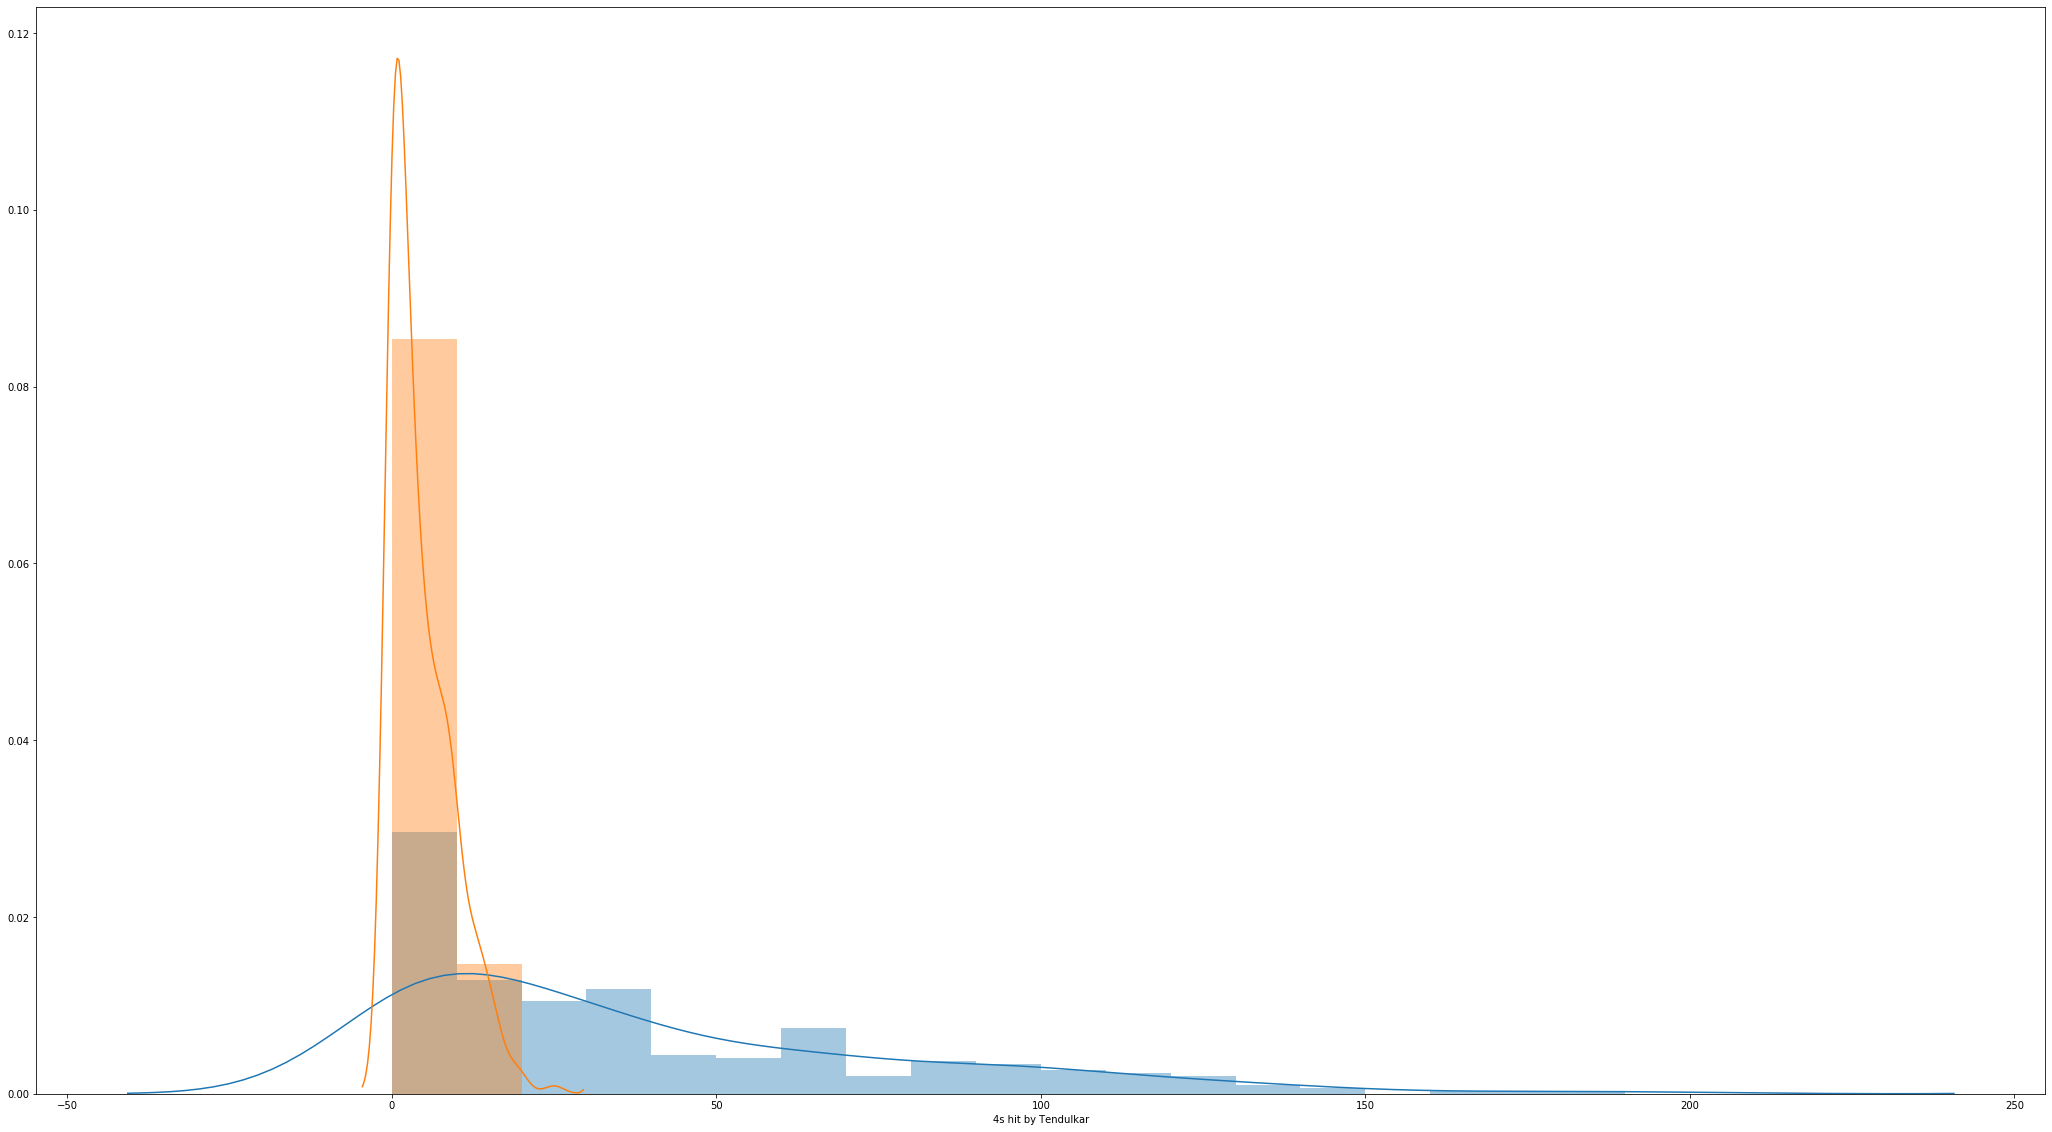

In [113]:
# Analysis on Sachin scores:
import seaborn as sns
import numpy as np
import re
from matplotlib import pyplot as plt
sachin_score = pd.read_csv('tendulkar_ODI.csv')
# remove DNB with 0
# remove - with 0;
# re.sub(r'([^a-zA-Z ]+?)','', x))
sachin_score['Runs'] = sachin_score['Runs'].apply(lambda x: 0 if x =='DNB' or x == 'TDNB' else int(re.findall(r'\d+', x)[0]))
sachin_score['4s'] = sachin_score['4s'].apply(lambda x: 0 if x == '-' else int(x))
plt.figure(100, figsize=(36, 20))
sns.distplot(sachin_score["Runs"], bins=range(sachin_score["Runs"].min(), sachin_score["Runs"].max(), 10))
plt.xlabel("Runs Scored by Tendulkar")

sns.distplot(sachin_score["4s"], bins=range(sachin_score["4s"].min(), sachin_score["4s"].max(), 10))
plt.xlabel("4s hit by Tendulkar")
#sachin_score.head()
# data = sachin_score.apply(np.sort, 1).groupby(['Runs'])['Runs'].transform('size')
# data.head(10)
#data = sachin_score.groupby('Runs')
#print(data.head())

#plt.yscale('symlog')
#sns.barplot(x='Runs', y='4s', data = sachin_score)

In [114]:
# Quantitivate variables: Univariate Analysis:
# you can treat numeric variables as ordered categorical variables. For analysis, you can deliberately convert numeric variables into ordered categorical, for example, if you have incomes of a few thousand people ranging from $5,000 to $100,000, you can categorise them into bins such as [5000, 10000], [10000,15000] and [15000, 20000].
# This is called 'binning'. 

# Mean
# Median:
# which one to use:
# e.g Mean and median are single values that broadly give a representation of the entire data. As Anand stated very clearly, it is very important to understand when to use these metrics to avoid doing inaccurate analysis.
# While mean gives an average of all the values, median gives a typical value that could be used to represent the entire group. As a simple rule of thumb, always question someone if someone uses the mean, since median is almost always a better measure of ‘representativeness’.

# use Q1 and Q3, for data analysis. or 25% or 75 %. Interquartile distance:
# Standard deviation and interquartile difference are both used to represent the spread of the data.
# Interquartile difference is a much better metric than standard deviation if there are outliers in the data. This is because the standard deviation will be influenced by outliers while the interquartile difference will simply ignore them.

# Quantitative Variables: Summary Metrics:
# Why summary metrics such as mean/std dev are not representative of the data in some cases.

# 1) Why median is better than the mean in some cases:
# if you have outliers in your data set then median is always better representation of the data.

# 2) STD Dev doesn't tell anything about the population increase. As the formula for it is mostlly depednent on the mean that's why having an outliers in the population
# affects the variance much.
# random number examples:
# find mean & median and std dev of the population.
# best method to communicate the spread is to use 25% or 75 % or quartiles.

# Summary of Univariate Analysis:
    #Metadata description describes the data in a structured way. You should make it a habit of creating a metadata description for whatever data set you are working on. Not only will it serve as a reference point for you, it will also help other people understand the data better and save time.

    #Distribution plots reveal interesting insights about the data. You can observe various visible patterns in the plots and try to understand how they came to be.

    #Summary metrics are used to obtain a quantitative summary of the data. Not all metrics can be used everywhere. Thus, it is important to understand the data and then choose what metric to use to summarise the data.



In [149]:
# Graded question
df = pd.read_csv('popularity.csv', sep='\s*,\s*',engine='python')
# 10800.000000
krk = df[df.shares > 10800]
print(round(100*(krk['shares'].count())/len(df.index)), 2)
# remove values having shares greater than 
df = df[df.shares <= 10800]
print(df["shares"].mean())
print(df["shares"].describe([0.95]))
#print(df["shares"].median())
#print(df["shares"].max())


5.0 2
2074.334386533202
count    37663.000000
mean      2074.334387
std       1871.814139
min          1.000000
50%       1400.000000
95%       6400.000000
max      10800.000000
Name: shares, dtype: float64


In [152]:
# Segmented Univariate Analysis:
# How to segment the data or group the data:

# Basics of segmentation:
# 1) Take raw data:

# 2) Group by dimensions:

# 3) Summarise using a relavant metric such as mean, median etc

# 4) Compare the aggregated metric across groups/categories:

# demo on the EDA_nas.csv sheet:
# Checkout the site to compare different segmentted univariate analysis:


# Comparision of Averages:
# you have to be careful while checking out the segmented univariate analysis:
# if there are very small difference in averages then sometimes that means there is no signigicance at all.
# “Don’t blindly believe in the averages of the buckets — you need to observe the distribution of each bucket closely and ask yourself if the difference in means is significant enough to draw a conclusion. If the difference in means is small, you may not be able to draw inferences. In such cases, a technique called hypothesis testing is used to ascertain whether the difference in means is significant or due to randomness.“ Don’t worry if you do not get the concept of hypothesis correctly, It will be dealt separately in hypothesis module.

# DEMO:
ed = pd.read_csv('EDA_na.csv')
ed.head()


# Comparision study on other variables:

# we also have to think about the bottom quaritles and see the progress of it across the distribution.
# Any data analysis can be done on the segment of the data, which makes it very powerful analytics.


,STUID,State,District,Gender,Age,Category,Same.language,Siblings,Handicap,Father.edu,...,Express.science.views,Watch.TV,Read.magazine,Read.a.book,Play.games,Help.in.household,Maths..,Reading..,Science..,Social..
0,26011001001,Maharashtra,1,Girl,13 years,3.0,2.0,1 sibling,No,Illiterate,...,Agree,Every day,Never,Once a month,Once a week,Every day,NaN,33.33,NaN,NaN
1,26011001002,Maharashtra,1,Girl,15 years,3.0,2.0,3 siblings,No,NaN,...,Agree,Once a week,Never,Never,Once a week,Every day,NaN,62.07,NaN,NaN
2,26011001003,Maharashtra,1,Girl,14 years,3.0,2.0,3 siblings,No,Degree & above,...,Agree,Every day,Once a month,Once a month,Once a week,Every day,NaN,41.38,NaN,NaN
3,26011001004,Maharashtra,1,Boy,13 years,3.0,2.0,3 siblings,No,Secondary,...,Agree,Every day,Every day,Never,Every day,Every day,29.82,NaN,NaN,NaN
4,26011001005,Maharashtra,1,Girl,14 years,3.0,2.0,2 siblings,No,Primary,...,Neither,Never,Never,Once a month,Once a week,Every day,NaN,NaN,27.27,NaN


In [187]:
# Graded question:
# 1
census = pd.read_csv('EDA_census.csv')
females_20_24 = census[(census['age_group'] =='20-24') & (census['area_name'] =='INDIA') & (census['population_type'] == 'Total')]
print(females_20_24['illiterate_females'])
print(females_20_24['total_females'])

# 2:
total_data = census[(census['area_name'] =='INDIA') & (census['population_type'] == 'Total') & (census['age_group'] != 'All ages')]
total_data['rate'] = total_data['literate_persons'] / total_data['total_persons']
total_data.head(30)


15    12212466
Name: illiterate_females, dtype: int64
15    53839529
Name: total_females, dtype: int64


D:\anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


NameError: name 'cens' is not defined

In [206]:
# 3. which states shows the highest female literacy rate ?
census = pd.read_csv('EDA_census.csv')
census = census[(census['area_name'] !='INDIA') & (census['population_type'] == 'Total') & (census['age_group'] == 'All ages')]
census['rate'] = census['literate_females']/ census['total_females']
census = census.groupby('area_name')['rate'].agg('mean')
census.head(29)

area_name
State - ANDAMAN & NICOBAR ISLANDS    0.730989
State - ANDHRA PRADESH               0.529337
State - ARUNACHAL PRADESH            0.486906
State - ASSAM                        0.563950
State - BIHAR                        0.419430
State - CHANDIGARH                   0.716304
State - CHHATTISGARH                 0.516982
State - DADRA & NAGAR HAVELI         0.538243
State - DAMAN & DIU                  0.686022
State - GOA                          0.764054
State - GUJARAT                      0.608616
State - HARYANA                      0.573929
State - HIMACHAL PRADESH             0.676125
State - JAMMU & KASHMIR              0.474959
State - JHARKHAND                    0.463671
State - KARNATAKA                    0.602047
State - KERALA                       0.830382
State - LAKSHADWEEP                  0.782456
State - MADHYA PRADESH               0.504843
State - MAHARASHTRA                  0.670531
State - MANIPUR                      0.612908
State - MEGHALAYA       

In [249]:
# BIVARIATE ANALYSIS:
#__________________________________________________________
# In the last session, you learnt how to perform segmented univariate analysis e.g. how gender or father’s education impacts student’s percentage in science, maths and reading. But what if you want to analyse pairs of continuous variables at a time? For example, how the sales figure depends on the marketing spends? Or, for that matter, how two continuous variables depend on each other? Is there any way or concept to identify the relationship between two variables?
# Covariation:
# Two types of variables:
# 1) Continuous variables: Variables which you can add, numeric type variables which you can typically add up.
# 2) Categorical variables: Those variables for which you can do group by.

# Age is the example of both type of variables.

# we analyse if one variable increase then how it's changing other variables.
# = Correl() function in excel.
# you take two variables from the data and try to create a line across it.

# correlation is a number between -1 and 1 which quantifies the extent to which two variables ‘correlate’ with each other.
# If one increases as the other increases, the correlation is positive
# If one decreases as the other increases, the correlation is negative
# If one stays constant as the other varies, the correlation is zero

# Demo
import datetime
prices = pd.read_csv('EDA_Gold_Silver_prices.csv')
prices['date'] = prices['Month'].apply(lambda x: datetime.datetime.strptime(x, '%b-%y'))
prices['year'], prices['month'] = prices['date'].dt.year, prices['date'].dt.month
prices = prices[prices['date'].dt.year == 2008]

print(np.corrcoef(prices['GoldPrice'], prices['SilverPrice']))
prices.head(90)

[[1.         0.00958376]
 [0.00958376 1.        ]]


,Month,SilverPrice,GoldPrice,date,year,month
130,Jan-08,632.29,35025.78,2008-01-01,2008,1
131,Feb-08,701.87,36642.46,2008-02-01,2008,2
132,Mar-08,775.49,39082.77,2008-03-01,2008,3
133,Apr-08,700.96,36416.00,2008-04-01,2008,4
134,May-08,718.20,37435.38,2008-05-01,2008,5
135,Jun-08,729.63,38087.88,2008-06-01,2008,6
136,Jul-08,773.80,40256.56,2008-07-01,2008,7
137,Aug-08,625.97,36026.85,2008-08-01,2008,8
138,Sep-08,555.58,37815.02,2008-09-01,2008,9
139,Oct-08,507.20,39235.79,2008-10-01,2008,10


In [250]:
# Examples: Stock exchange example
# Where one commodity shares are linked with others commoidty
# There are two things which you would have noticed from the lecture:
#The correlation matrix of stock prices of different countries gives a real sense of the relationship between many variables.
#The correlated variables are grouped by similarities, and correlation can also be calculated for ‘groups of variables’. This is called ‘clustering’ which you will study in detail later in the machine learning course, but the idea is to form a hierarchy of similar groups of variables.
# Correlation matrix: Create a correlation matrix by your self

# 


In [269]:
# Practise question
import matplotlib.pyplot as plt
df = pd.read_csv('currencies.csv')
country_list = ['Euro', 'Japanese Yen', 'U.K. Pound Sterling', 'U.S. Dollar', 'Australian Dollar', 'Indian Rupee']
df.head()
df = df[country_list]
df.head()
df.corr()
# f = plt.figure(figsize=(40, 25))
# plt.matshow(df.corr(), fignum=f.number)
# plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
# plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=14)
# plt.title('Correlation Matrix', fontsize=16);
#currency.head()

,Euro,Japanese Yen,U.K. Pound Sterling,U.S. Dollar,Australian Dollar,Indian Rupee
Euro,1.000000,-0.645719,0.531150,-0.210587,0.331588,0.243851
Japanese Yen,-0.645719,1.000000,-0.970308,0.210295,-0.582032,-0.270123
U.K. Pound Sterling,0.531150,-0.970308,1.000000,-0.042303,0.579213,0.314681
U.S. Dollar,-0.210587,0.210295,-0.042303,1.000000,0.607010,0.872862
Australian Dollar,0.331588,-0.582032,0.579213,0.607010,1.000000,0.921475
Indian Rupee,0.243851,-0.270123,0.314681,0.872862,0.921475,1.000000


In [273]:
# categorical variables:
# E.g Degree of education impact on marks ? depedens on region, geneder etc.
# What s the difference in categorical and continuous data geathering.

# Graded question:
nas = pd.read_csv('nas.csv')
nas = nas[['Mother.edu', 'Siblings']]
nas.corr()
nas.head(40)
# done with excel pivot table:


,Mother.edu,Siblings
0,Illiterate,1 sibling
1,Illiterate,3 siblings
2,Illiterate,3 siblings
3,Secondary,3 siblings
4,Illiterate,2 siblings
5,Illiterate,2 siblings
6,Illiterate,1 sibling
7,Illiterate,4+ siblings
8,Illiterate,2 siblings
9,Illiterate,4+ siblings


In [274]:
# Derived Metrics:
# 1) Variables:
#------------------------------
# Type driven: from the column itself we can get the information 
# These metrics can be dervied by understanding the variable typlogy. 

# Steven's typlogy: Categotrical variable:
# a) Nominal Variables: Categorical var, where the categories differ only by their names; there is no order among cateogires. e.g color,(red, green, blue), gender(male|female), department(HR|Sales)
# b) Ordinal Variables: Categories follow a certain order, but the mathmatical differenc between categories is not meaningful. for e.g Education level(primary school, high school, college) | Height(high, medium, low | performance(bad, good , excellent))
# Note that ordinal var are nominal as well
# b) Interval Variable: In which mathmatical difference among the categories are meaningful. But division or multiplication is not. For e.g Temprature in degree celsius(the difference b/w 40 and 30 deg C is meaningful but 30 * 40 deg is not), dates( the difference between two dats is the number of days b/w them but 25 may/5th June ) is not meaninguful.
# Note that interval variable are both nominal and ordinal
# c) Ratio Variable: Apart from the mathmatical difference , the ratio is possible. e.g sale in dollars( 100 dollars is twice of 50 dollars), Marks of student (50 is half of 100) etc
# Note: Ratio var are Nominal, ordinal and interval

# Latitiude and longitude
# Email address
# URL
# for e.g from Date type column we can derive Day, Month, Quarter, Year, Decade  |  Day of the week , Week of the month, Week of the year | Summer, Winter, Moonsson | Weekdays, Weekends, Months Start, Month End|, Business month | YTD
# or from time we can derive: Hour , Min, seconds, AM, PM.|  Working / None working hourse etc
#_----------------------------------
# you can convert ratio  type variable to ordinal var.
# DEMO: Anand mentioned that you can derive several types of columns from text. Let's say you have a column having the 'customer feedback' given on websites such as Amazon or Zomato. 
# Each value in the column is a feedback given in English by a customer or a user. As such, this is a nominal type variable.
# What other variables can you derive from this column? Also think about the type of the variable you are deriving - is it possible to derive ordinal, interval and ratio type variables from this column?

# solution: we can derive long comments|  short comments based on the length of the comment.
# or we can do NLP and classigy in in postive comment or negative comment.

# Location: from location you can retrieve: District, City, State and Country | North, East, South, West | Urban Rural, Metro | Time Zone | Ruling party|



# Can we derive new columns from the quantitaive variables:
# we can use binning or create another columns for mean| etc.

# e.g: Web URL: Host domain | Parameters | Hastag 
# Names: First Name | Surname | Middle Name 



In [294]:
# Business driven metrics:
# For e.g:
# Student marks: WHat is the cut off to pass the exam:
# Banking: No of transaction in a month | Min balance | No of card issue is equal to target
# Cricket: Scored Century or not|? if we don't know the meaning of 4 in cricket .

# for all these decsion we require business understanding.

# Deriving metrics from the business perspective is not an easy task. It requires a decent domain experience. Without understanding the domain correctly, deriving insights becomes difficult and prone to errors.
score = pd.read_csv('odi-batting.csv')

score['century'] = score['Runs'].apply(lambda x: 1 if x>=100 else 0)

# r = score.groupby('Player')['century'].agg('sum').reset_index()
# r =  r.sort_values(by='century', ascending = False)
# r.head()
score['strike_rate'] = round((score['Runs'] / score['Balls']) * 100, 1)
r = score[score['century']== 1].groupby('Player')['strike_rate'].agg('max').reset_index()
r =  r.sort_values(by='strike_rate', ascending = False)
r.head()
#print(score.head())

,Player,strike_rate
231,Shahid Afridi,255.0
154,Mark V Boucher,216.2
226,Sanath T Jayasuriya,206.2
234,Shane R Watson,192.7
33,Brian C Lara,188.7


In [310]:
score = pd.read_csv('odi-batting.csv')
score = score[score['Country']=='India']
score['date'] = pd.to_datetime(score['MatchDate'])
score['century'] = score['Runs'].apply(lambda x: 1 if x>=100 else 0)
score['year'] = score['date'].dt.year
# prices['date'] = prices['Month'].apply(lambda x: datetime.datetime.strptime(x, '%b-%y'))
# prices['year'], prices['month'] = prices['date'].dt.year, prices['date'].dt.month
dt = score.groupby('year').agg('sum').sort_values(by='century', ascending= False)
dt.head()


,Runs,Balls,century
year,,,
1998,8037,10525,18
1999,8756,11827,15
2009,6808,7381,13
2010,6063,6993,12
2005,6471,7770,11


In [311]:
# Data driven Analysis:
# rule of thumb is to take ratio: e.g no of computer owners and internet users;
# To summarise, data-driven metrics can be created based on the variables present in the existing data set. For example, if you have two variables in your data set such as "weight" and "height" which shows a high correlation. So, instead of analysing "weight" and "height" variables separately, you can think of deriving a new metric "Body Mass Index (BMI)". Once you get the BMI, you can easily categorise people based on their fitness, e.g. a BMI below 18.5 should be considered as an underweight category, while BMI above 30.0 is considered as obese, by standard norms. This is how data-driven metrics can help you discover hidden patterns out of the data.


Text(0.5, 0, 'hours')

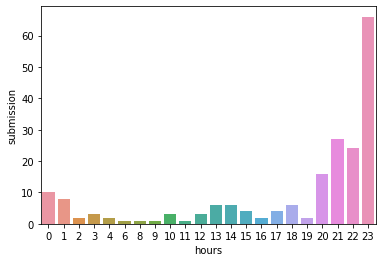

In [385]:
# Graded question:
from datetime import date, time
sub = pd.read_csv('grades.csv')
sub['student_id'] = sub['submission'].apply(lambda x: x.split('/')[4])
sub['roll_no'] = sub['submission'].apply(lambda x: x.split('/')[5])
sub['ext'] = sub['roll_no'].apply(lambda x: x.split('.')[1])
# r =  sub.groupby('ext')['student_id'].agg('count').reset_index()
# r.head()
sub['date'] = pd.to_datetime(sub['submit_time'])
sub['submit_date'] = sub['date'].dt.date
sub['submit_time'] = sub['date'].dt.time
sub['hours'] = sub['date'].dt.hour
sub_group = sub.groupby('hours')['submission'].agg('count').reset_index().sort_values(by= 'submission', ascending=False)
#student_after_1st_deadline = sub[(sub['submit_date'] > date(2017, 1, 3))]

sns.barplot(sub_group["hours"], sub_group['submission'])
plt.xlabel("hours")

In [ ]:
# Final Notes for EDA
# Read about Preferential stats or Power law: Enron scandal, How money makes money.
# Again watch few videos for EDA.